## imports

In [25]:
# to read any rno-g data root file and plot waveforms and extract analysis variables such as snr
import sys, os
import matplotlib.cm as cm
sys.path.append(os.path.abspath('/data/user/sanyukta/rno_code'))
from reading.data_reading import *
from functions.functions import *

In [13]:
# constants
pa_chs = [0,1,2,3]
hpols = [8,4]
uvs = [5,6,7]
deep_chs = np.concatenate((pa_chs,hpols,uvs))

## reading root

In [2]:
st_id = 11
att = 0
fiber = 0
run = 1785
input_dir = f'/data/user/sanyukta/rno_data/cal_pulser/station{st_id}/fiber{fiber}/{att}dB/station{st_id}_run{run}_combined.root'
# alternatively can use any path to the desired root file
if not os.path.exists(input_dir):
    raise FileNotFoundError(f"Input file {input_dir} does not exist.")

CAL_PULSER_THRESHOLD = 200000 #for cal-pulser run filter
selector = [lambda event_info: (event_info.sysclk - event_info.sysclkLastPPS[0]) % (2**32) <= CAL_PULSER_THRESHOLD]
events, times, volts = get_eventsvoltstraces(basic_read_root(input_dir, selector), band_pass=1, pulse_filter=1)


 reading /data/user/sanyukta/rno_data/cal_pulser/station11/fiber0/0dB/station11_run1785_combined.root ......


WARNING - 2025-09-03 11:18:56,439 - NuRadioReco.RNO_G.channelBlockOffsetFitter - Trace has large block offsets (>53% of Vrms), removing by fitting.
/tmp/ipykernel_526712/3775327112.py:11: RuntimeWarning: overflow encountered in scalar subtract
  selector = [lambda event_info: (event_info.sysclk - event_info.sysclkLastPPS[0]) % (2**32) <= CAL_PULSER_THRESHOLD]


## plotting waveform

In [4]:
ch_ids = [0,1,2,3,8,4,5,6,7]
avg_volt = {}
for ch in ch_ids:
    avg_volt[ch] = align_and_average_voltage_traces([volts[event_id][ch] for event_id, event in enumerate(events)])


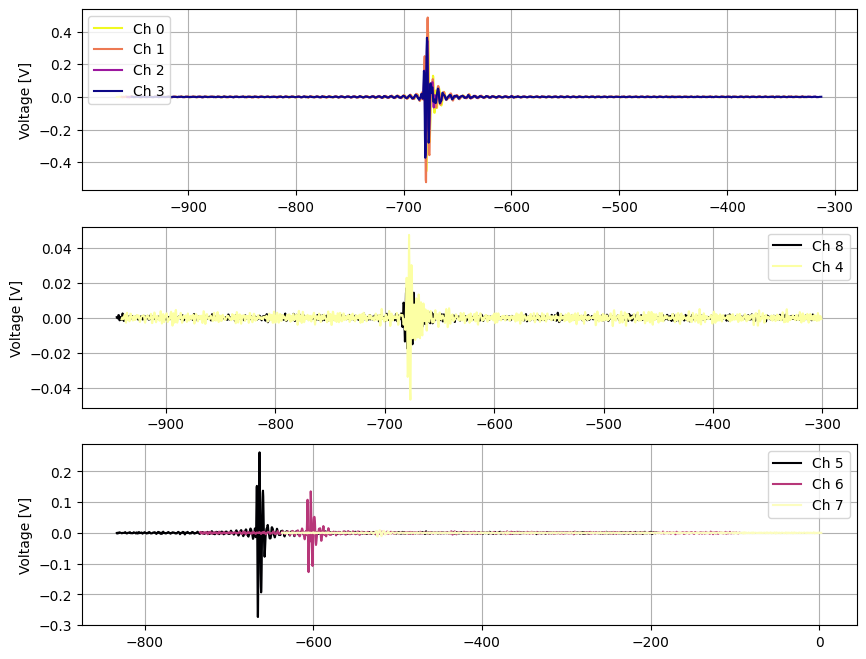

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(10,8))

colors = cm.viridis(np.linspace(0, 0.8, len(pa_chs)))  # Avoid yellow end of viridis
for i, ch in enumerate(pa_chs):
    ax[0].plot(times[0][ch], avg_volt[ch], label=f'Ch {ch}', color=colors[i])

colors = cm.cool(np.linspace(0, 1, len(hpols)))  # Blue to magenta, no yellow
for i, ch in enumerate(hpols):
    ax[1].plot(times[0][ch], avg_volt[ch], label=f'Ch {ch}', color=colors[i])

colors = cm.winter(np.linspace(0, 1, len(uvs)))  # Blue to green, no yellow
for i, ch in enumerate(uvs):
    ax[2].plot(times[0][ch], avg_volt[ch], label=f'Ch {ch}', color=colors[i])

for i in range(3):
    ax[i].set_ylabel('Voltage [V]')
    ax[i].grid()
    ax[i].legend()